In [78]:
from __future__ import print_function, division
import sys
import csv
import os
import numpy 
import pylab as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'isreal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [79]:
allmales = {}
allfemales = {}

In [80]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [81]:
#filename = []
#for i in range(2, 4):
    #for j in range (1, 4, 6, 8, 9):
        #filename.append 'pinc_%s
#filename

In [82]:
gencode = ['08_2', '08_3']
ethnicity =['_1_1', '_1_4', '_1_6', '_1_8', '_1_9']
keys = ['all', 'white', 'black', 'asian', 'hispanic']

def load_dict(gencode, dictname):
    values = []
    for ethnicity in ethnicities:
        values.append(pd.read_excel(url + 'pinc'+ gencode + ethnicity + '.xls', header=9))
    dict_name = dict(zip(keys, values))
    return dict_name
load_dict('08_3', '_1_4')

{'all':                                        Characteristic  Total with Income  \
 0                                                 NaN                NaN   
 1                                           ....Total           109956.0   
 2                                            Earnings            74545.0   
 3                                  ..Wages and Salary            71220.0   
 4                           ..Nonfarm Self-Employment             4694.0   
 5                              ..Farm Self-Employment              774.0   
 6                                     Social Security            26923.0   
 7                  SSI (Supplemental Security Income)             3386.0   
 8                                   Public Assistance             1541.0   
 9                                   Veterans Benefits              619.0   
 10                                  Survivor Benefits             2387.0   
 11                                Disability Benefits              8

In [83]:
allmales = load_dict('08_2', allmales)
allfemales = load_dict('08_3', allfemales)

In [84]:
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [85]:
for k, v in allfemales.items():
    print("####", k)
    print (v.describe())

#### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN       

In [86]:
for k, v in allmales.items():
    print ("####", k)
    print(v.describe())

#### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2170.521739            229.086957         89.065217   
std          4613.142818            568.574742        127.425168   
min             2.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         16484.000000           2762.000000        472.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         113.478261        118.500000          134.130435   
std          189.010375        204.980189          259.457092   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN       

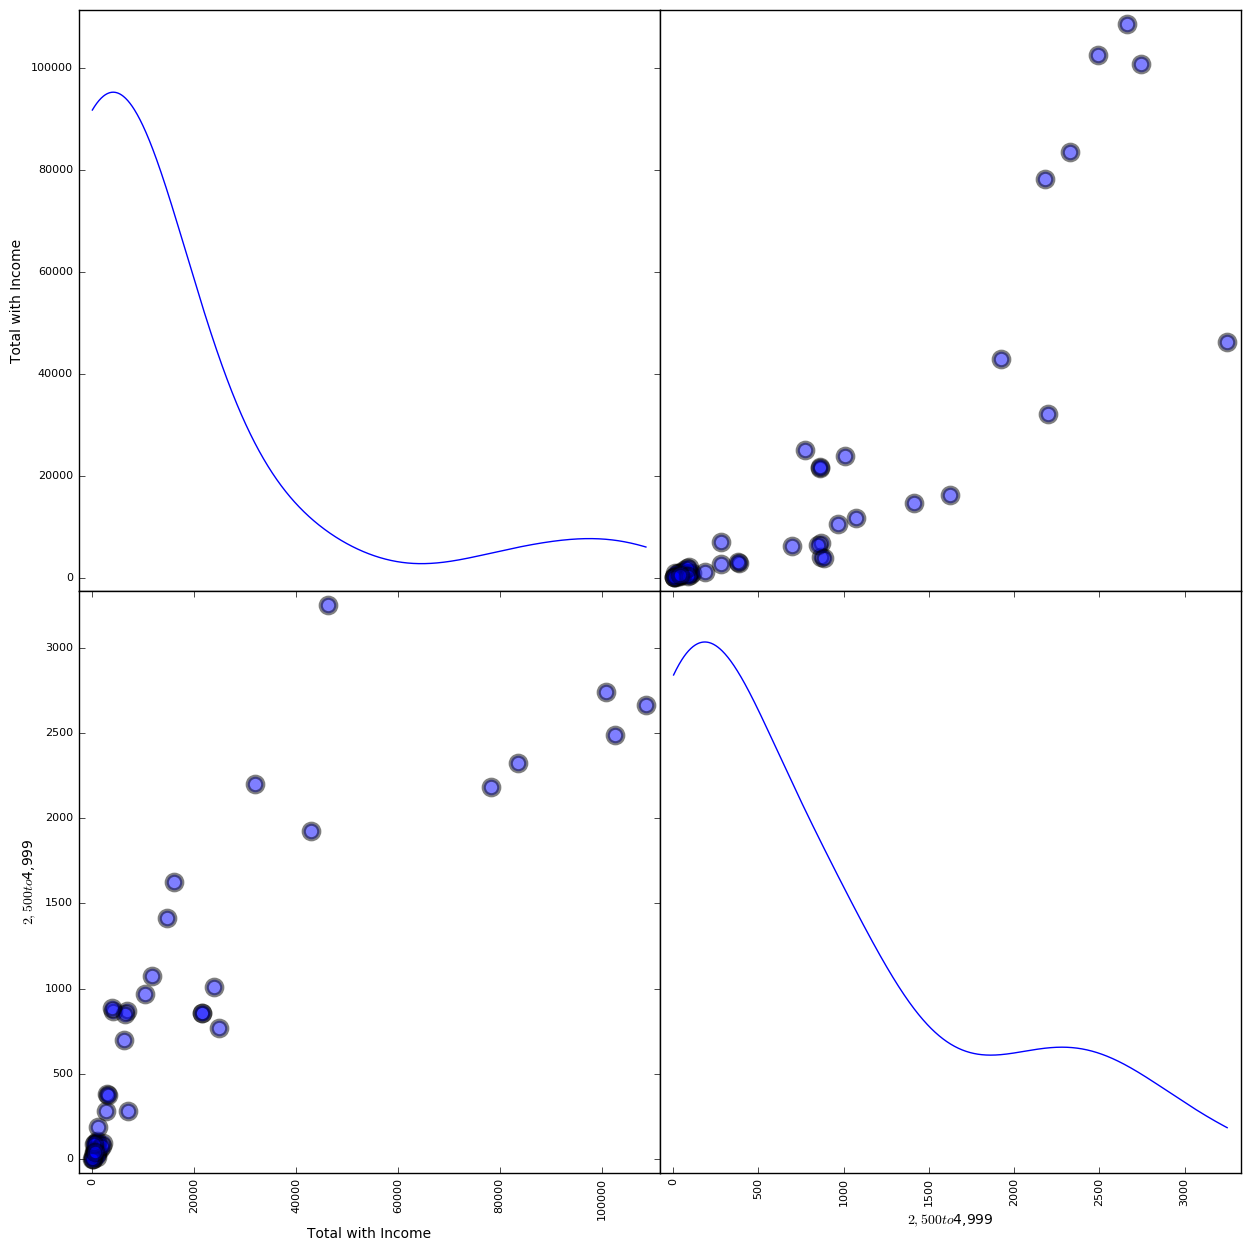

In [87]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

In [88]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [92]:
for gender in [allmales, allfemales]:
    for k in gender:
        isreal = gender[k].applymap(np.isreal)
        for c in gender[k].columns:
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] = np.nan
                gender[k][c] = gender[k][c].astype(float)

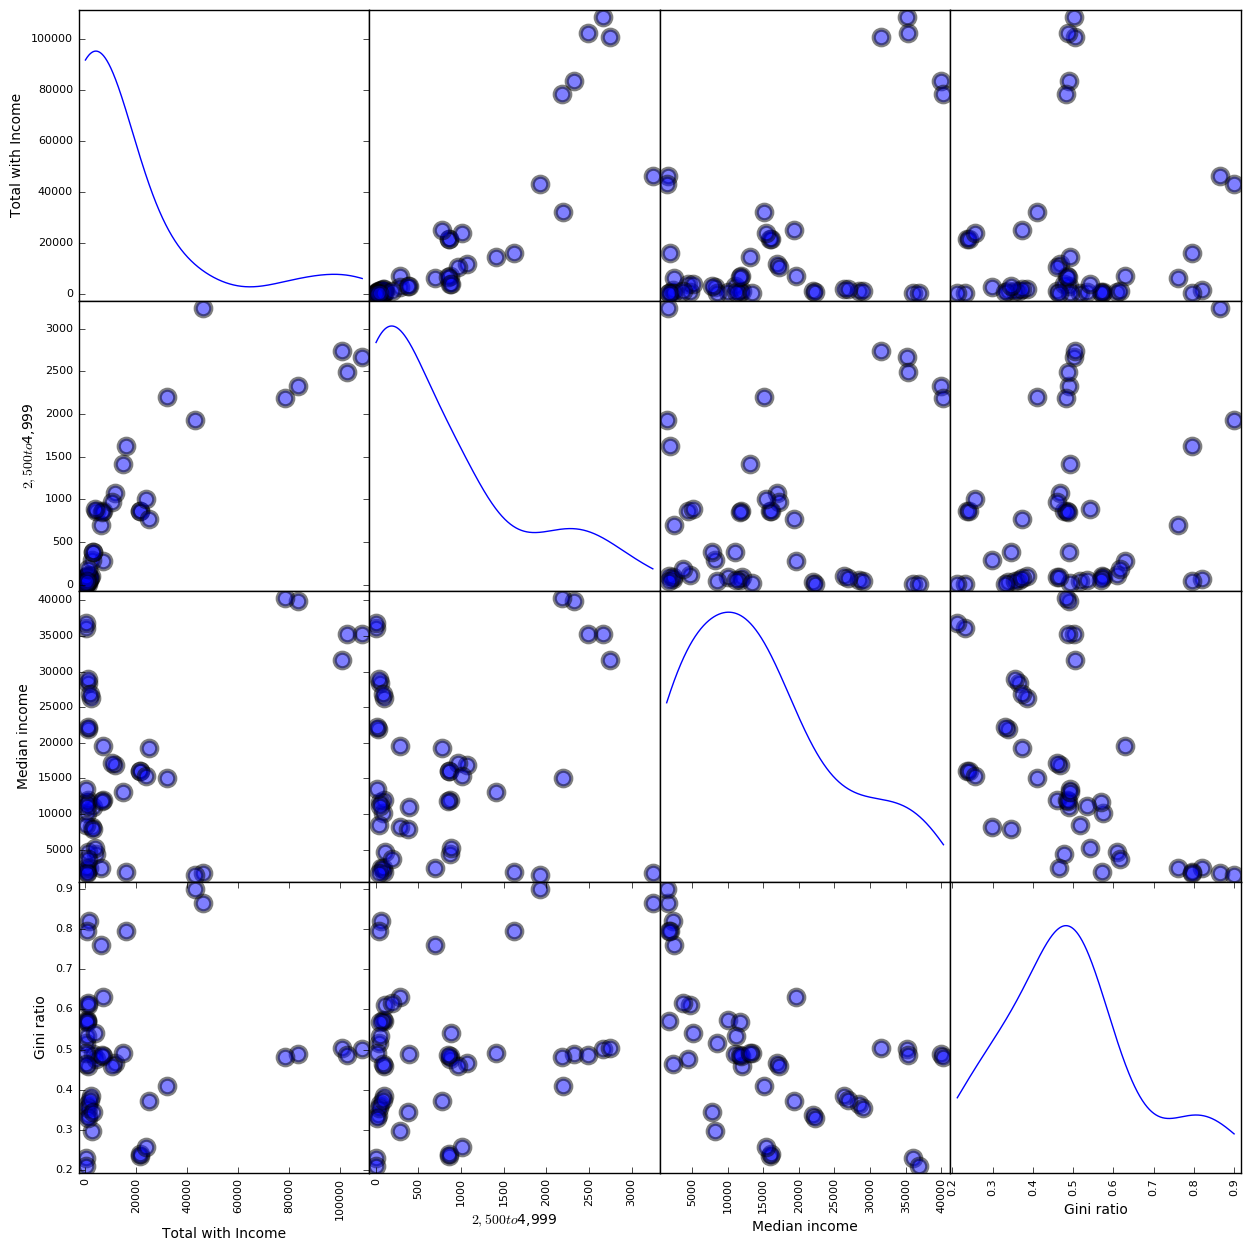

In [90]:
fig_2 = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

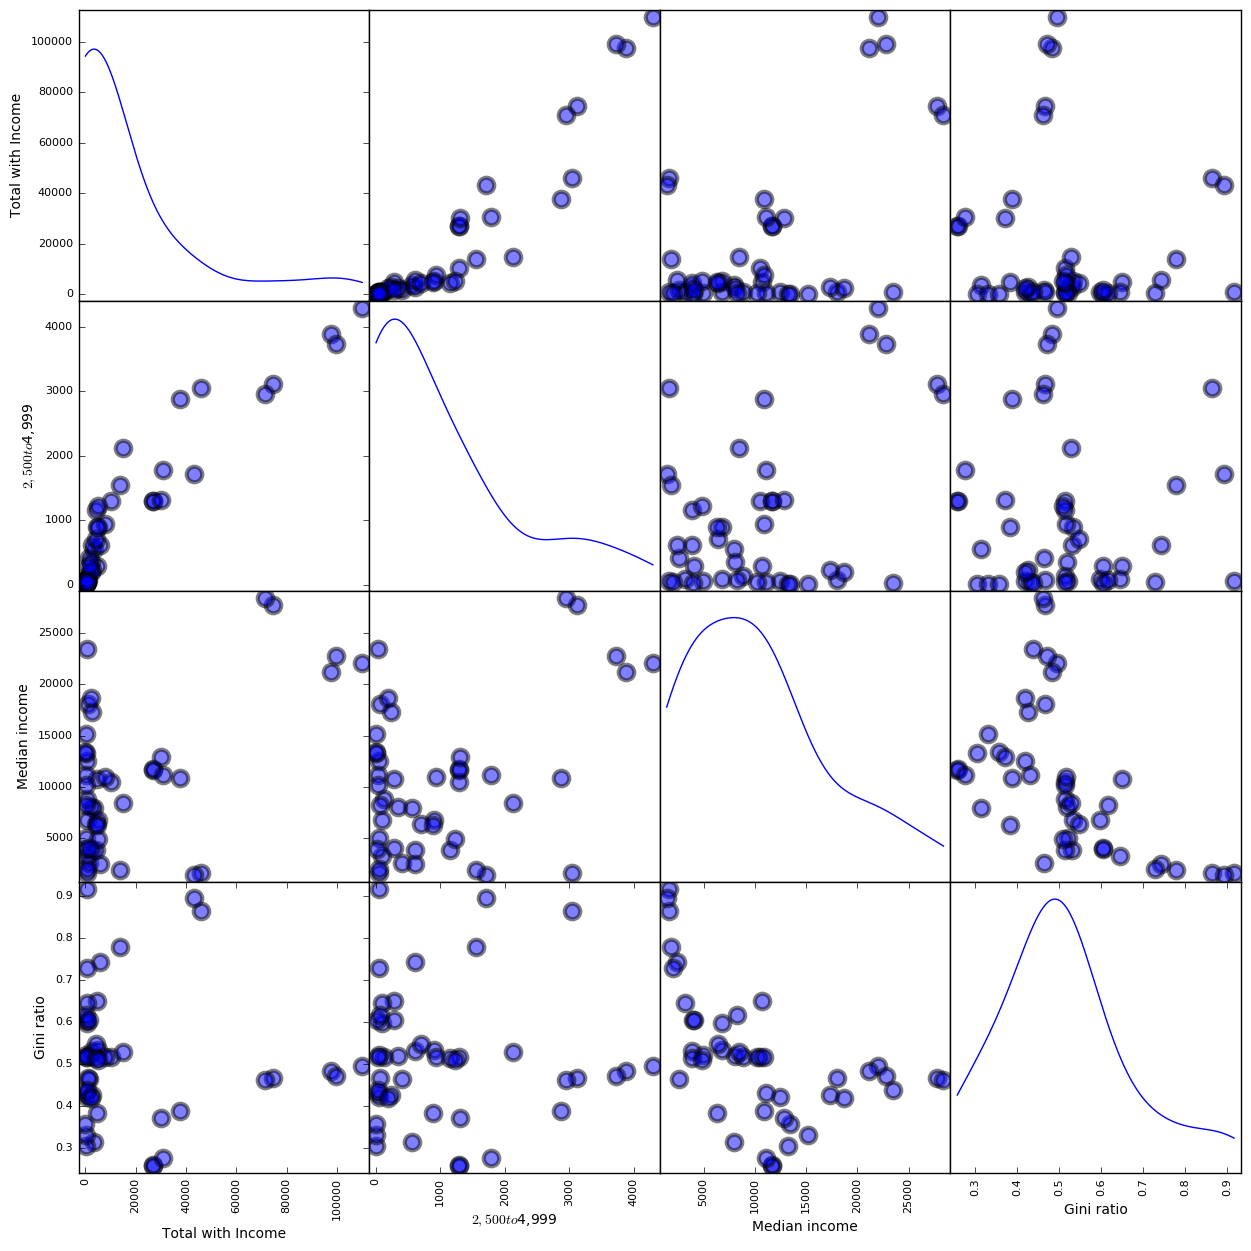

In [91]:
fig_2 = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

In [99]:
x = allmales['all']
y = allfemales['all']
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.961e+32
Date:                Mon, 10 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:38:14   Log-Likelihood:                 3046.8
No. Observations:                 100   AIC:                            -6092.
Df Residuals:                      99   BIC:                            -6089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7000   2.34

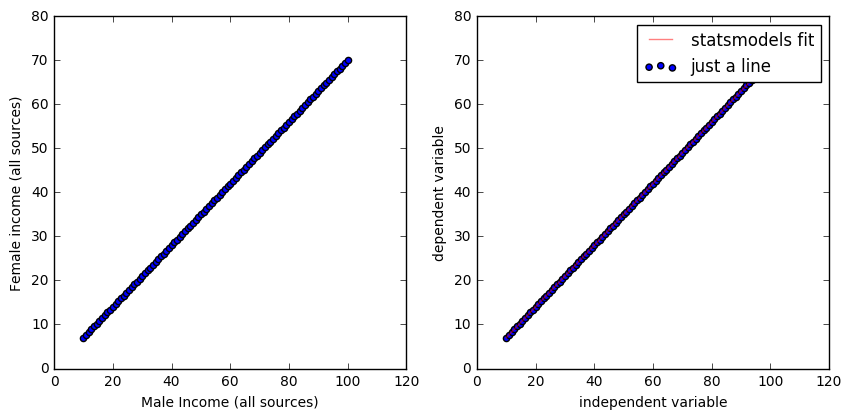

In [101]:
x = np.linspace(10,100,100)
y = line(0.7, 0, x)

mrnew = myregression(x, y)
xnew = np.linspace(10,100,10)
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "just a line")
ax.set_xlabel('Male Income (all sources)')
ax.set_ylabel('Female income (all sources)')
ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, 
         label = "statsmodels fit")
ax2.legend()

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.765e+04
Date:                Mon, 10 Oct 2016   Prob (F-statistic):          5.56e-123
Time:                        16:38:15   Log-Likelihood:                -236.20
No. Observations:                 100   AIC:                             474.4
Df Residuals:                      99   BIC:                             477.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7042      0

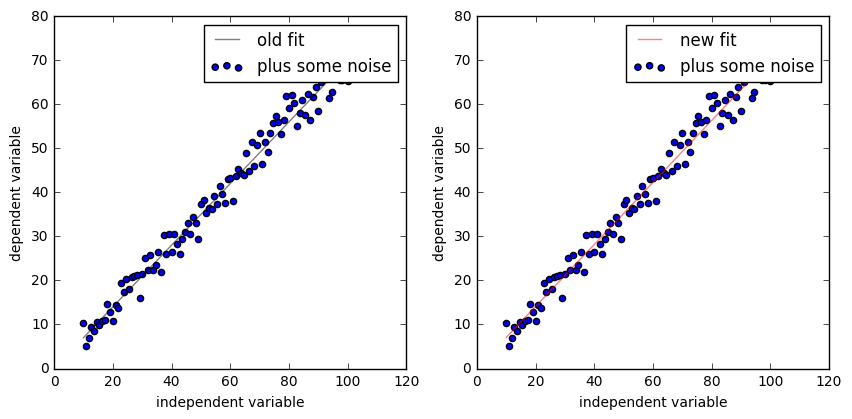

In [102]:
y = y + np.random.randn(100) * 2.5
mrold = mrnew

#I use just OLD: the ordinary square fit which does not take the error bars 
#into account
#refer to statsmodels documentation!!
mrnew = myregression(x, y)

fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5, label='old fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax = fig.add_subplot(222)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, label='new fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            WLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4573.
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           1.13e-84
Time:                        16:42:40   Log-Likelihood:                -345.38
No. Observations:                 100   AIC:                             692.8
Df Residuals:                      99   BIC:                             695.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8533      0

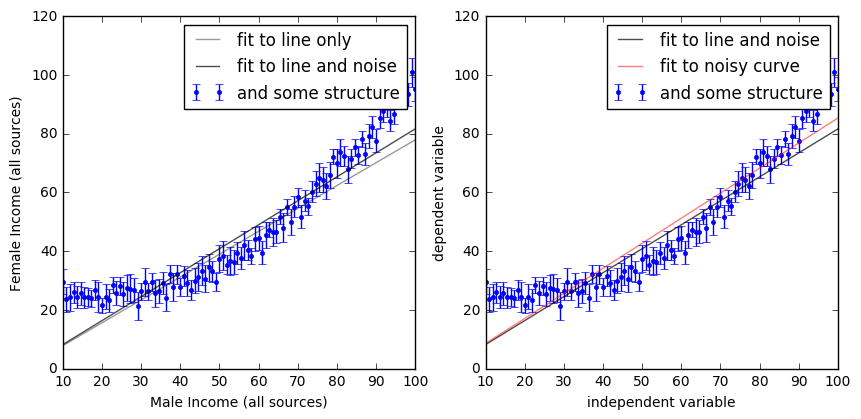

In [112]:
#y = y+np.cos(x/100*2*np.pi*10.0)
y = y + 3e-3 * ((x - 50)**2)
mrolder = mrold
mrold = mrnew

#now i fit the data taking into account the errorbars: 
#u ise WLS (weighted square fit) 
#instead of OLS (ordinary square fit)
mrnew = myregression(x, y, method='W')

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
e = np.random.rand(100)*2.5+2.5
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrolder.predict(xnew), 'k', alpha=0.4,
       label = "fit to line only")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.7,
       label = "fit to line and noise")

ax.set_xlabel('Male Income (all sources)')
ax.set_ylabel('Female Income (all sources)')
ax.legend()

ax = fig.add_subplot(222)
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.7,      
       label = "fit to line and noise")

ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5,
       label = "fit to noisy curve")

ax.set_xlabel('Male Income (all sources)')
ax.set_ylabel('Female Income (all sources)')
ax.legend()

numpy polyfit parameters [  1.16168804e-02  -1.30904794e+00   2.92473003e+01]
mean of residuals 1.06 (1.06e+00)
sum squared of residuals 76.51 (7.65e+01)


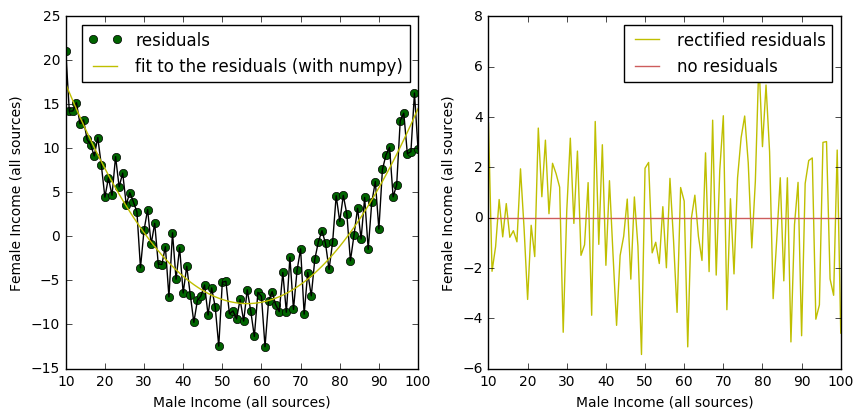

In [113]:
mrres = np.polyfit(x, y-mrnew.predict(x), 2)
#these are the parameters of the fit: the a b and c in 
#ax^2 + bx + c
print ('numpy polyfit parameters', mrres)
fig = pl.figure(figsize=(10,10))
ax=fig.add_subplot(221)
ax.plot(x, y-mrnew.predict(x), 'o', color='DarkGreen', label='residuals')
ax.plot(x, y-mrnew.predict(x), 'k-')

ax.plot(x, mrres[0] * x**2 + mrres[1] * x + mrres[2], 'y',
       label = 'fit to the residuals (with numpy)')
ax.set_xlabel('Male Income (all sources)')
ax.set_ylabel('Female Income (all sources)')
ax.legend()

ax=fig.add_subplot(222)

#and i plot the "residual of the residuals".... just for fun. 
#this is not normally something which one would include in the analysis
ax.plot(x,y - mrnew.predict(x) - (mrres[0] * x**2 + 
                                  mrres[1] * x + 
                                  mrres[2]), 'y',
       label = "rectified residuals")
ax.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed',
       label = "no residuals")

print ('mean of residuals {0:.2f} ({0:.2e})'.format(
                mean(y - mrnew.predict(x) - (mrres[1] +  mrres[0] * (x)))))
print ('sum squared of residuals {0:.2f} ({0:.2e})'.format(
        np.sqrt(sum((y - mrnew.predict(x))**2))))
ax.set_xlabel('Male Income (all sources)')
ax.set_ylabel('Female Income (all sources)')
ax.legend()

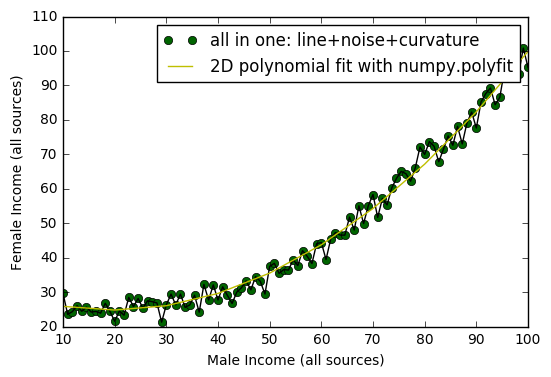

In [114]:
##second degree polynomial: arguments are i
#independent variable, dependent variable, degree of the polynomial
mrnew = np.polyfit(x, y, 2)

pl.plot(x, y, 'o', color='DarkGreen', label='all in one: ' + 
        'line+noise+curvature')
pl.plot(x, y, 'k-')


pl.plot(xnew, np.poly1d(mrnew)(xnew), 'y', alpha=1, 
        label = '2D polynomial fit with numpy.polyfit')

pl.xlabel('Male Income (all sources)')
pl.ylabel('Female Income (all sources)')
pl.legend()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3835.
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           4.82e-93
Time:                        16:43:47   Log-Likelihood:                -235.74
No. Observations:                 100   AIC:                             477.5
Df Residuals:                      97   BIC:                             485.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       29.2473      1.154     25.335   

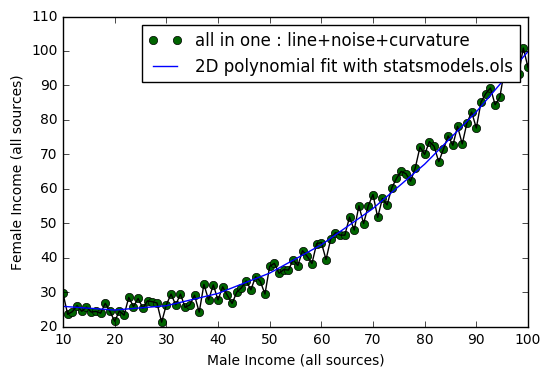

In [115]:
smreg = smf.ols(formula="y ~ x1 + I((x1)) + I((x1)**2)", 
                data={"x1" : x, "y" : y} ).fit()
print (smreg.summary())
pl.plot(x, y, 'o', color='DarkGreen', label='all in one : ' + 
        'line+noise+curvature')
pl.plot(x, y, 'k-')


pl.plot(xnew, smreg.predict(exog=dict(x1=xnew)), 
        label = '2D polynomial fit with statsmodels.ols')
pl.xlabel('Male Income (all sources)')
pl.ylabel('Female Income (all sources)')
pl.legend()

mean of residuals 0.00 (4.98e-14)
sum squared of residuals 0.00 (2.23e-06)


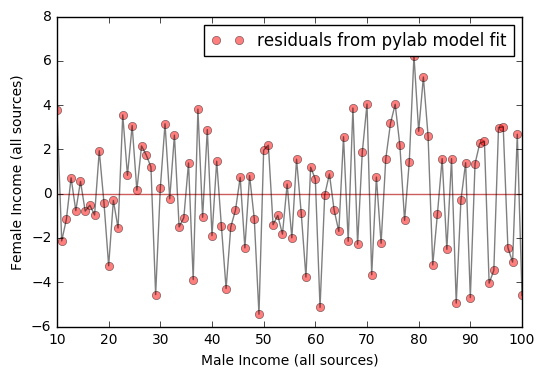

In [119]:
mrold = mrnew
mrnew = np.polyfit(x, y, 2)
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')

e = np.random.rand(100)*2.5+2.5
#pl.errorbar(x, y, yerr=e, label = "and some structure")
pl.plot(x, y - np.poly1d(mrnew)(x), 'ro', alpha=0.5,
       label = 'residuals from pylab model fit')
pl.plot(x, y - np.poly1d(mrnew)(x), 'k', alpha=0.5)


pl.xlabel('Male Income (all sources)')
pl.ylabel('Female Income (all sources)')
pl.legend()
print ('mean of residuals {0:.2f} ({0:.2e})'.format(mean(y - 
                                                       (mrnew[2] + 
                                                       mrnew[1] * (x) + 
                                                       mrnew[0] * (x**2)
                                                       ))))
print ('sum squared of residuals {0:.2f} ({0:.2e})'.format(np.sqrt(sum((y - 
                                                      (mrnew[2] + 
                                                       mrnew[1] * 
                         (x) + mrnew[0] * (x**2)))))))

In [128]:
from scipy.optimize import minimize
def residuals(data, model, error=None): 
    return residuals
    p0 = [0,1]
    result = minimize(residuals, p0, args=(x, y))
residuals([x,y], )

<function __main__.residuals>

TypeError: unsupported operand type(s) for -: 'function' and 'function'